# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. 
- The two columns “revenue_adj” and “budget_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Questions to explore:
- Which genres are most popular from year to year?
- What kinds of properties are associated with movies profit?

In [ ]:
#mount google drive to be able to import the data.
from google.colab import drive
drive.mount('/content/drive')

In [3]:
#import used libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
# to display the plots
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='wrangling'></a>
## Data Wrangling

### General Properties

first we explore general properties of the dataset like:
- first 5 rows and last 5 rows
- number of rows and columns
- count of non null values and zero values and data types
- find min, max, std and mean

In [4]:
#load the data in a dataframe then show the first 5 rows
df = pd.read_csv('/content/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#show last 5 rows
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
# number of rows and columns
df.shape

(10866, 21)

In [7]:
# number of non- null values and data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# mean, std, min and max
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

- from the first exploration of the data I found that these columns are not going to be used in this analysis ('id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget', 'revenue')
- I decided to drop the 'budget' and 'revenue' columns and keep the 'budget_adj' and 'revenue_adj' so that accounting for inflation wouldn't be a problem and the profit calculation would be more consistent for movies realsed in different years.
- find and drop duplicated rows, only one row was found.
- find and drop the null values
- investigating the data i found that more than half the movies have 0 budget_adj and 0 revenue_adj which is not realistic, I decided to replace them with nulls so it wouldn't affect the mean and std values, when exploring the budget_adj and revenue_adj properties they could be droped otherwise I would use all the data.
- finally convert the release_date to the right data type

In [9]:
#drop unused columns
df = df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget', 'revenue'], axis=1)

In [10]:
#recheck the number of columns
df.shape

(10866, 13)

In [11]:
#number of duplicates
df.duplicated().sum()

1

In [12]:
#drop duplicates
df = df.drop_duplicates();

In [13]:
#recheck the number of rows
df.shape

(10865, 13)

In [14]:
#number of nulls
df.isna().sum()

popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [15]:
#drop nulls
df.dropna(subset=['genres', 'cast', 'director', 'production_companies'], inplace=True)

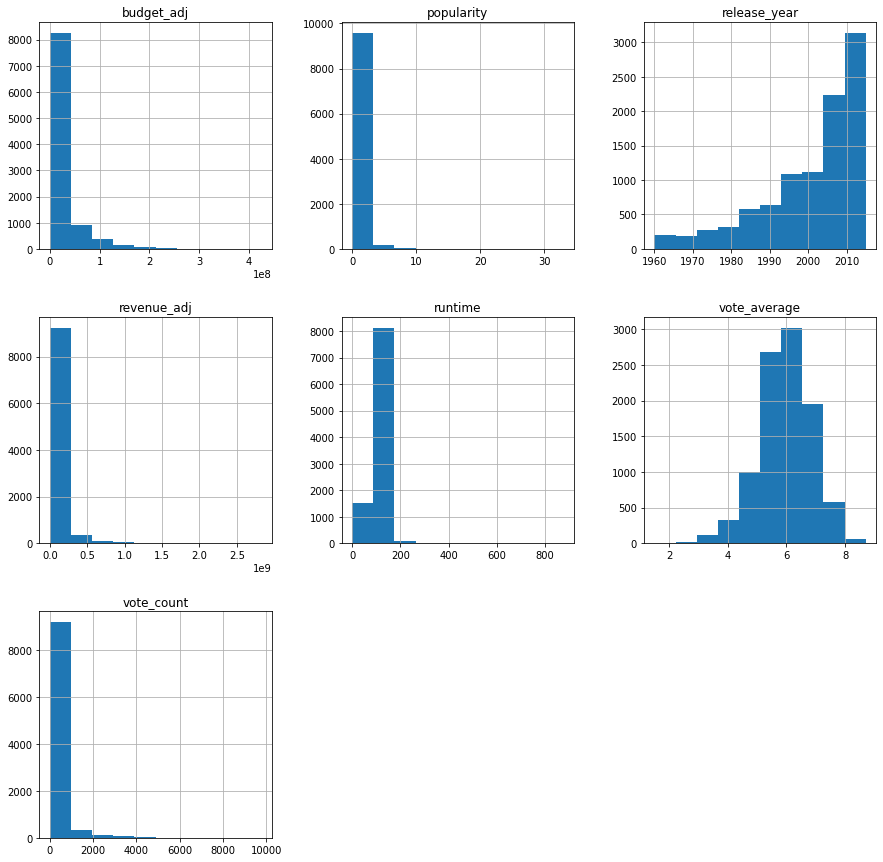

In [16]:
#check the distribution of each column
df.hist(figsize=(15, 15));

In [17]:
#number of zero values (missing data)
(df == 0).astype(int).sum(axis=0)

popularity                 0
original_title             0
cast                       0
director                   0
runtime                   13
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              4751
revenue_adj             5022
dtype: int64

In [18]:
#drop missing data in the run time column
df = df[df['runtime'] != 0]
#replace zeros with nulls in the 'budget_adj' and the 'revenue_adj' columns
df['budget_adj']=df['budget_adj'].replace(0, np.nan)
df['revenue_adj']=df['revenue_adj'].replace(0, np.nan)

In [19]:
#recheck mean, std, min and max
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9759.000000,9759.000000,9759.000000,9759.000000,9759.000000,5.020000e+03,4.750000e+03
mean,0.695266,103.063736,239.597602,5.964535,2000.862793,3.779483e+07,1.173732e+08
std,1.037370,27.641529,603.361812,0.912967,13.038056,4.221077e+07,2.002779e+08
min,0.000188,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.232931,91.000000,18.000000,5.400000,1994.000000,8.891774e+06,1.163858e+07
50%,0.420185,100.000000,46.000000,6.000000,2005.000000,2.374361e+07,4.584735e+07
75%,0.777162,112.000000,173.500000,6.600000,2011.000000,5.082002e+07,1.349884e+08
max,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


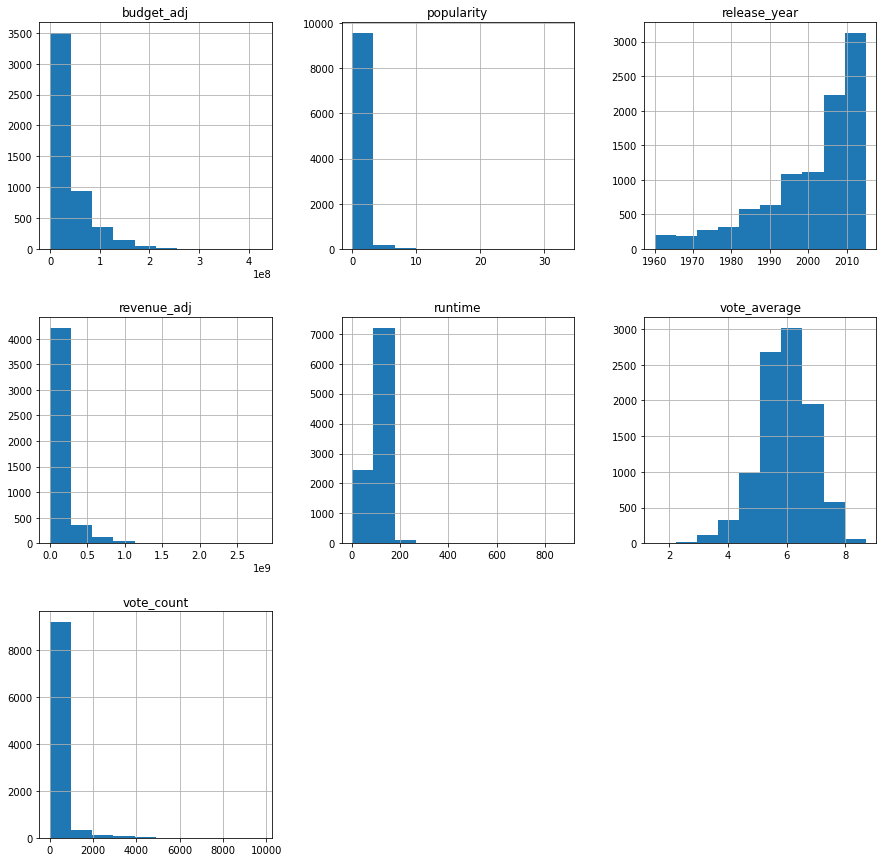

In [20]:
#recheck the distribution of each column
df.hist(figsize=(15, 15));

In [21]:
#recheck number of nulls
df.isna().sum()

popularity                 0
original_title             0
cast                       0
director                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              4739
revenue_adj             5009
dtype: int64

In [22]:
#recheck number of zero values (missing data)
(df == 0).astype(int).sum(axis=0)

popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [23]:
#recheck the shape
df.shape

(9759, 13)

In [24]:
#convert release_date columns to a datetime format
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)

In [25]:
#recheck the data types
df.dtypes

popularity                     float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 (Which genres are most popular from year to year?)

- find number of years
- arry of unique genre values: create a numpy array with all the values of genres and then seperate them by '|', then get the unique values only. I found that the data has 20 genres.
- create a dataframe with years as index and a column for every genre and find the mean value of popularity of the genre for every year
- plot the dataframe.
- print the top5 genres for each year.

In [26]:
#number of years
df['release_year'].nunique()

56

In [27]:
#creat an array of unique genre values
genresArry = df['genres'].str.split(pat="|").values
genresArry = np.concatenate(genresArry, axis=None)
genresArry = np.unique(genresArry)
print(genresArry)

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']


In [28]:
years = df['release_year'].sort_values().unique()
print(years)

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


In [29]:
df_1 = pd.DataFrame()

for g in genresArry:
  df_1[g] = (df.loc[df.genres.str.contains(g)].groupby(['release_year'])['popularity'].mean())

df_1.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,0.590724,0.700981,NaN,0.396000,0.346480,NaN,0.566305,0.278064,0.428247,0.194948,0.412364,0.591450,0.423531,NaN,0.541227,0.327905,NaN,0.811910,0.225863,0.567759
1961,0.365913,0.767323,2.631987,0.679838,0.806519,NaN,0.432233,0.896028,0.113651,0.113651,0.334463,0.254578,0.564749,0.712793,0.426036,0.300638,NaN,NaN,0.531184,0.210021
1962,0.845972,0.942513,NaN,0.273183,0.472816,NaN,0.401909,0.323463,0.235542,0.235542,0.640491,0.179368,0.323933,0.259220,0.365621,0.179212,NaN,0.760582,0.700762,0.414180
1963,0.951729,0.728487,2.180410,0.444481,0.552367,NaN,0.322448,0.852632,0.214071,0.351647,0.481618,0.376901,NaN,0.421033,0.399573,0.467836,NaN,0.719929,0.664326,0.246957
1964,0.813087,0.736431,0.445746,0.491229,0.261690,NaN,0.364818,0.878298,0.780640,0.152209,0.316377,0.189650,0.753799,0.308091,0.221586,0.226636,NaN,0.622580,0.930959,0.127679


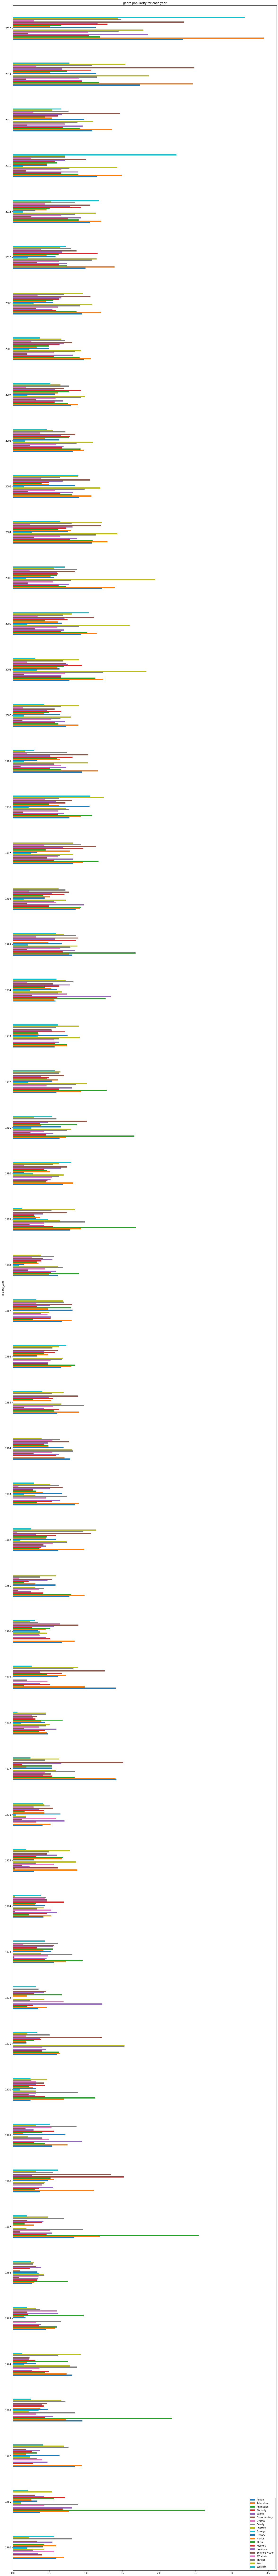

In [31]:
df_1.plot(figsize = (20, 200), kind = 'barh', title='genre popularity for each year')

In [32]:
#print top 5 movies for each year
for i in df_1.index:
    print(i)
    print(df_1.loc[i, :].sort_values(ascending =  False)[:5])

1960
Thriller     0.811910
Adventure    0.700981
Horror       0.591450
Action       0.590724
Western      0.567759
Name: 1960, dtype: float64
1961
Animation    2.631987
Family       0.896028
Crime        0.806519
Adventure    0.767323
Mystery      0.712793
Name: 1961, dtype: float64
1962
Adventure    0.942513
Action       0.845972
Thriller     0.760582
War          0.700762
History      0.640491
Name: 1962, dtype: float64
1963
Animation    2.180410
Action       0.951729
Family       0.852632
Adventure    0.728487
Thriller     0.719929
Name: 1963, dtype: float64
1964
War        0.930959
Family     0.878298
Action     0.813087
Fantasy    0.780640
Music      0.753799
Name: 1964, dtype: float64
1965
Music        0.968850
Family       0.662713
Romance      0.622780
Animation    0.600975
TV Movie     0.600975
Name: 1965, dtype: float64
1966
Animation    0.751857
Fantasy      0.424771
Family       0.423139
Romance      0.389565
Foreign      0.361556
Name: 1966, dtype: float64
1967
Animation  

In [33]:
#print genres sorted by mean of popularity to find the top 5 overall
df_1.mean().sort_values(ascending=False)

Adventure          0.974257
Animation          0.898964
Fantasy            0.808607
Science Fiction    0.799817
Action             0.787638
Family             0.732142
Thriller           0.663301
Crime              0.660675
War                0.649854
Mystery            0.584022
Western            0.556122
History            0.546024
Comedy             0.541823
Drama              0.537969
Romance            0.537912
Music              0.504661
Horror             0.438944
TV Movie           0.297528
Documentary        0.210500
Foreign            0.208544
dtype: float64

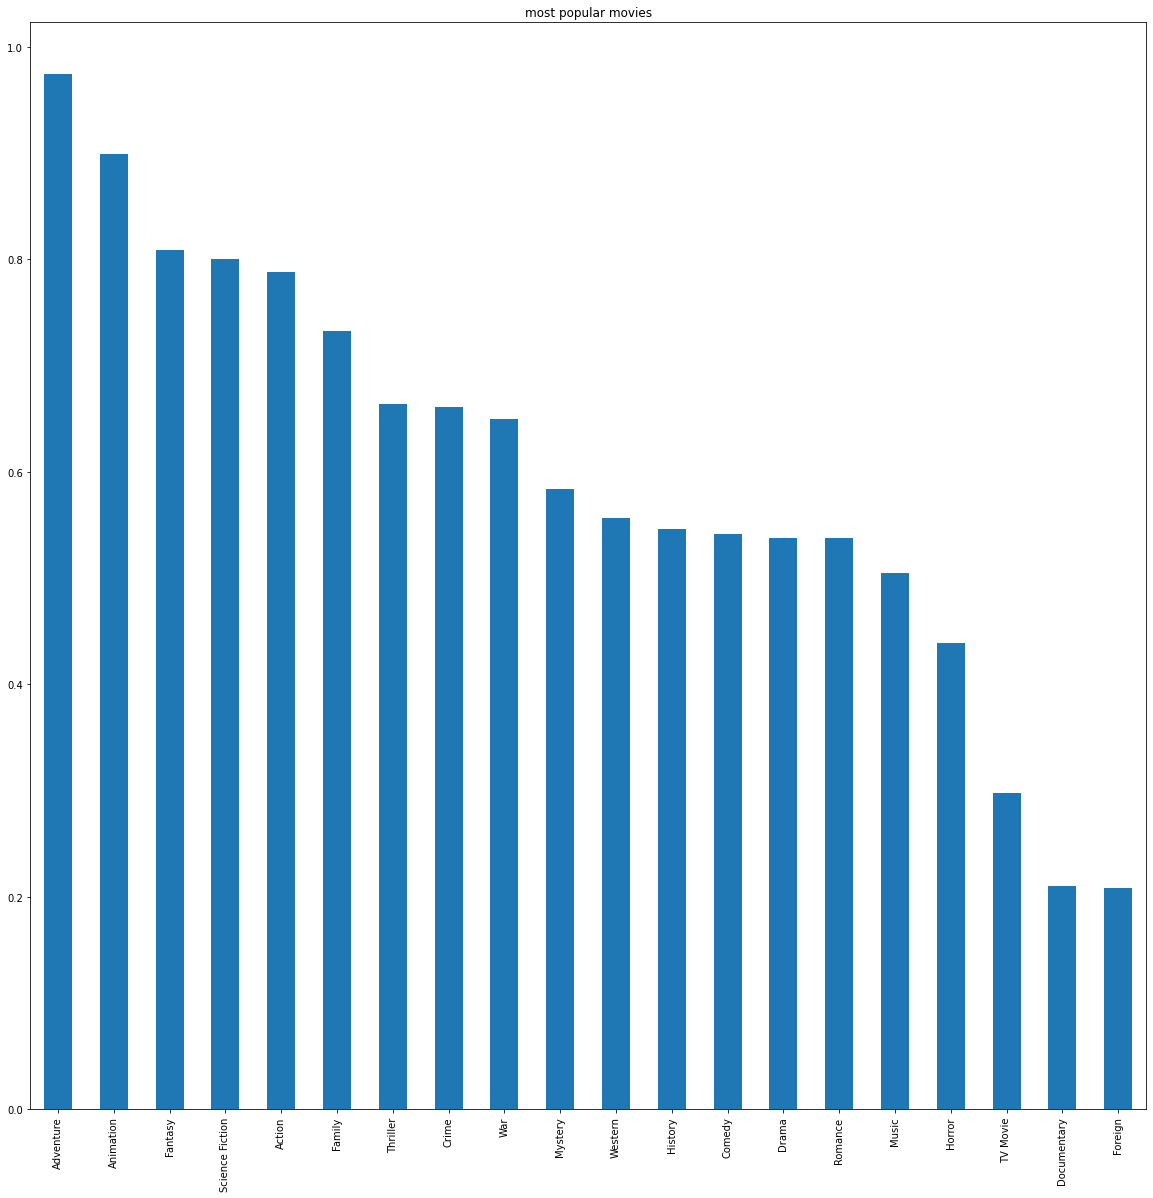

In [34]:
#bar plot of the most popular movies overall
df_1.mean().sort_values(ascending=False).plot(kind = 'bar', figsize = (20, 20), title='most popular movies')

###This plot shows that Adventure is the most popular genre overall while foreign is the least popular overall

### Question 2  (What kinds of properties are associated with movies that have high profit?)

- drop all the null values and put them in a new dataframe
- I created a new column for the profit (budget - revenue)
- sort the dataframe by profit, I found that there are movies with negative profit, these movies definitly don't have high profit so i dropped these rows.
- use scatter plot matrix to explore correlation between profit and other properties
- I found that a heatmap showes the correlation better.

In [35]:
#drop nulls from the revenue_adj and the budget_adj columns
df_corr = df.dropna()
#add the profit columns
df_corr['profit'] = df_corr['revenue_adj'] - df_corr['budget_adj']
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3805 non-null   float64       
 1   original_title        3805 non-null   object        
 2   cast                  3805 non-null   object        
 3   director              3805 non-null   object        
 4   runtime               3805 non-null   int64         
 5   genres                3805 non-null   object        
 6   production_companies  3805 non-null   object        
 7   release_date          3805 non-null   datetime64[ns]
 8   vote_count            3805 non-null   int64         
 9   vote_average          3805 non-null   float64       
 10  release_year          3805 non-null   int64         
 11  budget_adj            3805 non-null   float64       
 12  revenue_adj           3805 non-null   float64       
 13  profit           

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
#sort values by profit in the dataframe
df_corr = df_corr.sort_values(by=['profit'])
df_corr.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,0.250540,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,4.250000e+08,1.108757e+07,-4.139124e+08
5508,1.214510,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607,6.0,2013,2.386885e+08,8.357833e+07,-1.551102e+08
7031,0.948560,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,60,5.9,2004,1.673946e+08,2.980774e+07,-1.375868e+08
2435,1.189386,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,John McTiernan,102,Adventure|Fantasy|Action,Touchstone Pictures,1999-08-27,275,6.2,1999,2.094485e+08,8.076712e+07,-1.286813e+08
4970,1.653031,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,85,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,2003-10-20,753,6.8,2003,1.185353e+08,2.963382e+02,-1.185350e+08


In [37]:
#drop profit values less than zero
df_corr = df_corr[df_corr['profit'] > 0]

In [38]:
#check profit values less than zero
df_corr[df_corr['profit'] <= 0].count()

popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
dtype: int64

Text(0.5, 1.08, 'correlation matrix')

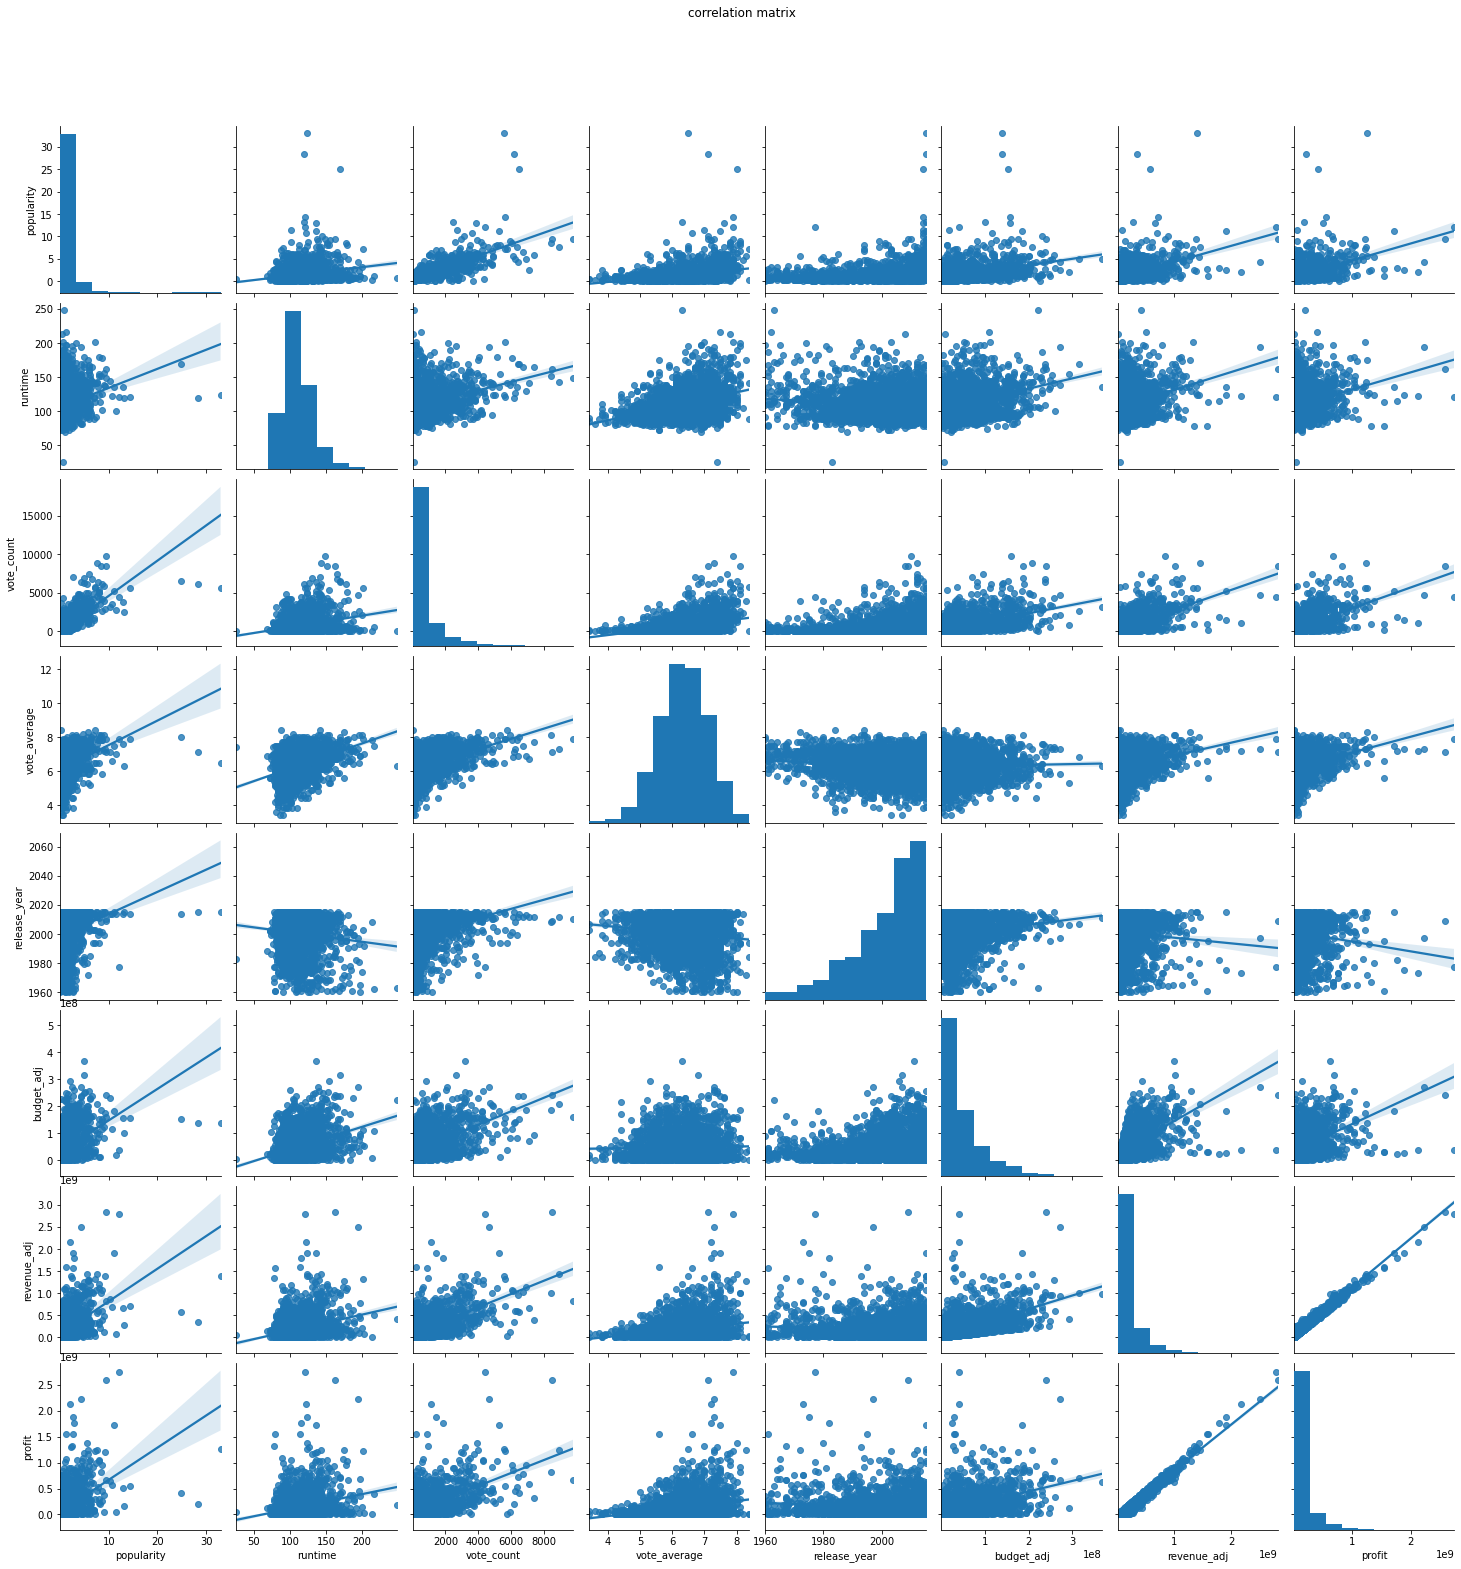

In [41]:
#scatter plot matrix to check the correlation
sn.pairplot(df_corr, kind = 'reg').fig.suptitle("correlation matrix", y=1.08)

###The scatter plot shows the correlation but I think a heatmap would be better

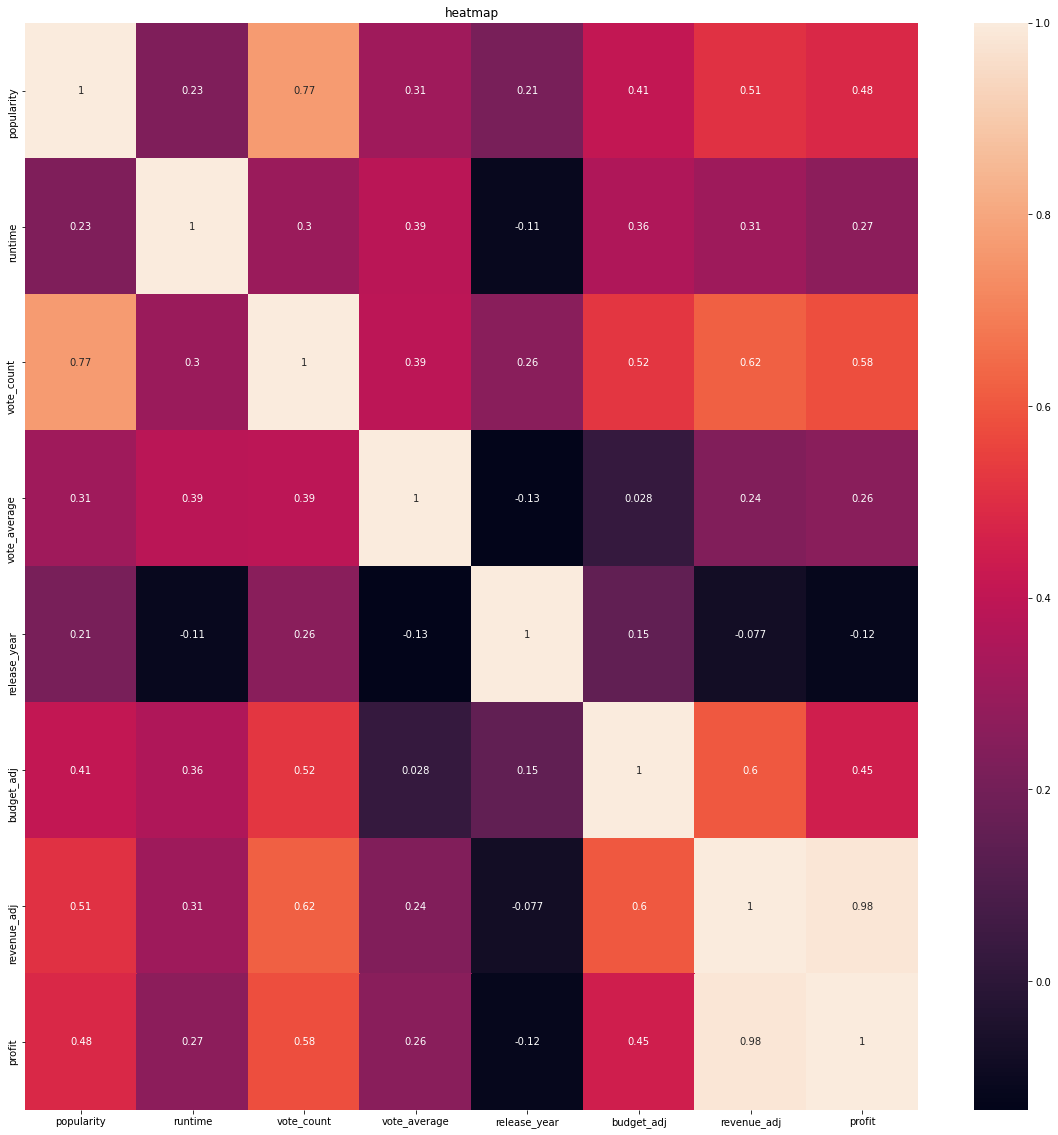

In [42]:
#heatmap to better find the correlation
fig, ax = plt.subplots(figsize=(20,20))

sn.heatmap(df_corr.corr(), annot=True, ax=ax)

ax.set_title('heatmap')
plt.show()

###The heatmap shows correlation between profit and popularity, vote_counts budget_adj and revenue_adj

<a id='conclusions'></a>
## Conclusions

### Question 1: Which genres are most popular from year to year?
- we got the top 5 genres for each year, and we found that the top 5 popular genres overall are (Adventure, Animation, Fantasy, Science Fiction, Action).

### Question 2 (What kinds of properties are associated with movies that have high profit?)
- from the heatmap we find that the is correlation between the profit and these properties:
  - some correlation with popularity, which make sense because some movies get popular after years of thier realse date, this dataset doesn't contain data about revenue other than movie theatre tickets.
  - correlation with vote_counts.
  - some correlation with budget_adj.
  - and of course very strong correlation with revenue_adj.

### limitations:
- as mentioned above, this dataset doesn't contain data about revenue other than movie theatre tickets.
- also profit calculation is not accurate because the movies budget doent contain adds budget for example.
- more than half the data set doesn't have revenue or budget which means that half of the data set wasn't used when exploring the profit.

referrences:

https://stackoverflow.com/questions/29229600/counting-number-of-zeros-per-row-by-pandas-dataframe

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

https://datatofish.com/correlation-matrix-pandas/

https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/

https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid

https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
